In [2]:
import pandas as pd 

import psana as ps
import numpy as np
import math 
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial as npply
import sys
import os
import h5py
import scipy.stats as st
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter as gf
from sklearn.utils import resample
sys.path.append('/reg/data/ana16/rix/rixlv1519/results/LCLS_LV15_2021/TestCode/EarlyScience/AnalyzeH5/')
from chemRIXSAnalysis import *
from ChemRIXSClasses import *
from filterTools import *
sys.path.append('/reg/data/ana16/rix/rixlv1519/results/LCLS_LV15_2021/Functions/')
from Functions import *
from Load_Scans import *
from raw_data_class import RawData as RDC
from pro_data_class import ProData as PDC
%matplotlib notebook


font = {'size'   : 16}
mpl.rc('font', **font)
# %matplotlib widget
cmap = plt.cm.get_cmap('terrain').reversed()

In [3]:
exp = 'rixlv1519'
small_data_folder = '/reg/data/ana01/rix/%s/hdf5/smalldata/' % exp #changeme
scans = [83]



In [4]:
raw_datas = []
for scan in scans:
    raw_data = load_scans(small_data_folder,exp,scan)
    
    I0_intensities_fim0, I0_specs_fim0, baselines_fim0 = \
    process_fim(raw_data.fim0_raw,np.arange(0,8),np.arange(0,50),np.arange(103,112))
    
    I0_intensities_fim1, I0_specs_fim1, baselines_fim1 = \
    process_fim(raw_data.fim1_raw,np.arange(0,8),np.arange(0,50),np.arange(103,112))
             
    intensities_fim2=process_fim_2(raw_data.fim2_raw,np.arange(0,8))
    
    andor_dir_intensities, andor_dir_specs, baseline_andor_dir = \
    process_andor(raw_data.andor_dir_raw,np.arange(500,800),np.arange(900,1250))
    
#     if raw_data.laser == 1:
#         r = []
        
#     if raw_data.laser == 0:
#         r = []

    raw_data.changeValue(I0_intensities_fim0=I0_intensities_fim0,
                        I0_specs_fim0=I0_specs_fim0,
                        baselines_fim0=baselines_fim0,
                        I0_intensities_fim1=I0_intensities_fim1,
                        I0_specs_fim1=I0_specs_fim1,
                        baselines_fim1=baselines_fim1,
                        intensities_fim2=intensities_fim2,
                        andor_dir_intensities=andor_dir_intensities,
                        andor_dir_specs=andor_dir_specs,
                        baseline_andor_dir=baseline_andor_dir
                        )
    
    
    raw_datas = raw_datas + [raw_data]
print(raw_datas[0].getKeys())

generating mono_encoder_ev
loading TT
loading fim0
loading fim1
loading andor
loading fim2
dict_keys(['events', 'xgmd', 'gmd', 'energy_raw', 'mono_encoder', 'pitch_raw', 'horz_raw', 'evrs', 'lxt', 'laser', 'nan_cond', 'mono_encoder_ev', 'tt_pos', 'tt_posps', 'tt_posfwhm', 'fim0_raw', 'fim1_raw', 'andor_dir_raw', 'fim2_raw', 'I0_intensities_fim0', 'I0_specs_fim0', 'baselines_fim0', 'I0_intensities_fim1', 'I0_specs_fim1', 'baselines_fim1', 'intensities_fim2', 'andor_dir_intensities', 'andor_dir_specs', 'baseline_andor_dir'])


In [7]:
print(np.asarray(raw_datas[0].andor_dir_intensities).shape)

print(np.asarray(raw_datas[0].I0_intensities_fim0[4,:]).shape)
# filter_params = []
# for raw in raw_datas:
#     filter_param = PDC()
    
#     B_condition_1 = bounds_filter(raw.andor_dir_intensities,[[4000,'None'],[3]],True)
# #     B_condition_2 = bounds_filter(raw.I0_intensities_fim0[5,:],[[4000,'None'],[3]],True)
# #     B_condition_3 = bounds_filter(raw.I0_intensities_fim0[6,:],[[4000,'None'],[3]],True)
# #     B_condition_4 = bounds_filter(raw.I0_intensities_fim0[7,:],[[4000,'None'],[3]],True)
    
#     bounds_condition = B_condition_1
    
# #     Q_condition_1 = quad_filter(raw.I0_intensities_fim0[4,:],raw.andor_dir_intensities,[0.05,False],True)
    
# #     quadratic_condition = Q_condition_1
    
#     condition = bounds_condition 
    
#     filter_param.changeValue(condition=condition)
#     filter_params = filter_params + [filter_param]
    

# for i in range (4):
#     plt.figure()
#     plt.scatter(raw_datas[0].I0_intensities_fim1[i+4,:],raw_datas[0].andor_dir_intensities)
# plt.figure()
# plt.scatter((raw_datas[0].I0_intensities_fim1[5,:])[raw_datas[0].andor_dir_intensities>10000],raw_datas[0].andor_dir_intensities[raw_datas[0].andor_dir_intensities>10000])
# plt.show()
B_condition_1 = bounds_filter(raw_d.I0_intensities_fim0[4,:],[[4000,'None'],[2]],True)

B_condition_5 = bounds_filter(raw_datas[0].andor_dir_intensities,[[10000,250000],[2]],True)


(9599,)
(9599,)


NameError: name 'raw' is not defined

(18558,)
(17619,)
(17619,)


<IPython.core.display.Javascript object>


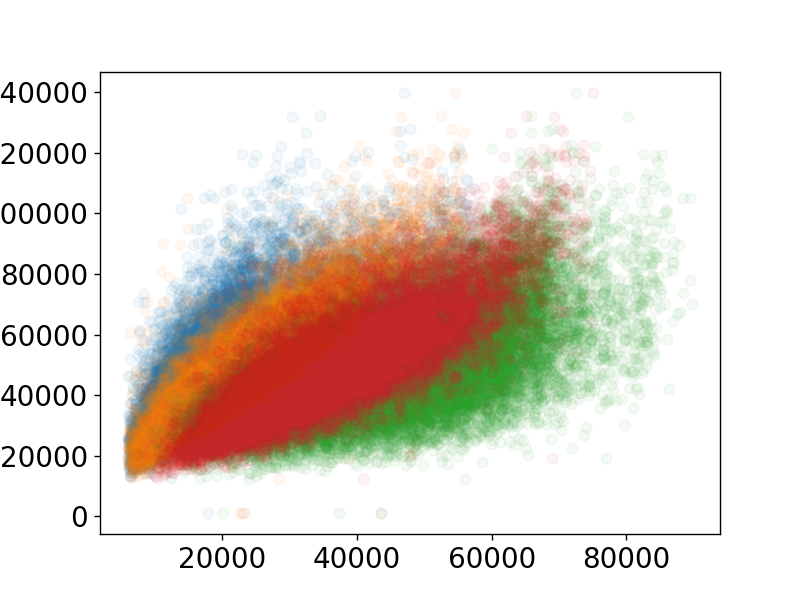

19717.569999999996
12638.46673458628


In [5]:
filter_params = []
for raw in raw_datas:
    filter_param = PDC()
    
    B_condition_1 = bounds_filter(raw.I0_intensities_fim0[4,:],[[6000,'None'],[3]],False)
    B_condition_2 = bounds_filter(raw.I0_intensities_fim0[5,:],[[6000,'None'],[3]],False)
    B_condition_3 = bounds_filter(raw.I0_intensities_fim0[6,:],[[6000,'None'],[3]],False)
    B_condition_4 = bounds_filter(raw.I0_intensities_fim0[7,:],[[6000,'None'],[3]],False)
    B_condition_5 = bounds_filter(raw_datas[0].andor_dir_intensities,[[10000,250000],[2]],False)
    
#     L_condition_1 = lin_filter(np.square(raw.I0_intensities_fim0[5,:]), raw.andor_dir_intensities,[0.05,False],True)

    
    bounds_condition = B_condition_1&B_condition_2&B_condition_3&B_condition_4#&B_condition_5
#     linearity_condition = L_condition_1
    condition = bounds_condition #& linearity_condition
    
    filter_param.changeValue(condition=condition)
    filter_params = filter_params + [filter_param]

    
    
I0_4 = raw.I0_intensities_fim0[4,:][filter_params[0].condition]
I0_5 = raw.I0_intensities_fim0[5,:][filter_params[0].condition]
I0_6 = raw.I0_intensities_fim0[6,:][filter_params[0].condition]
I0_7 = raw.I0_intensities_fim0[7,:][filter_params[0].condition]

Andor = raw_datas[0].andor_dir_intensities[filter_params[0].condition]

print(np.asarray(raw_datas[0].andor_dir_intensities).shape)
print(I0_5.shape)
print(Andor.shape)
plt.figure()
plt.scatter(I0_4,Andor,alpha=0.05)
plt.scatter(I0_5,Andor,alpha=0.05)
plt.scatter(I0_6,Andor,alpha=0.05)
plt.scatter(I0_7,Andor,alpha=0.05)
plt.show()

print(np.nanmedian(raw.I0_intensities_fim0[4,:]))
print(np.nanstd(raw.I0_intensities_fim0[4,:]))

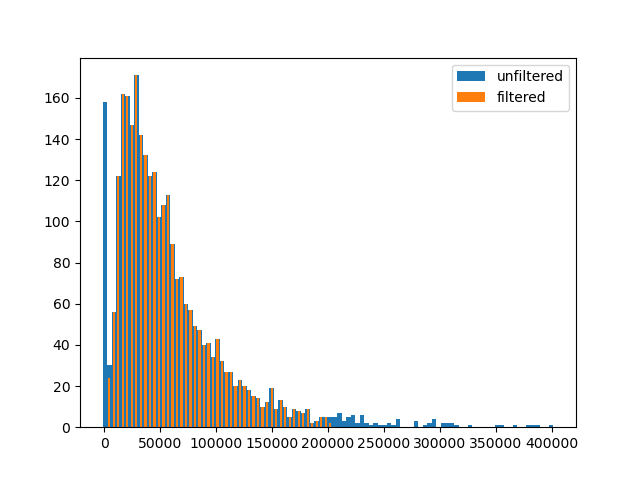

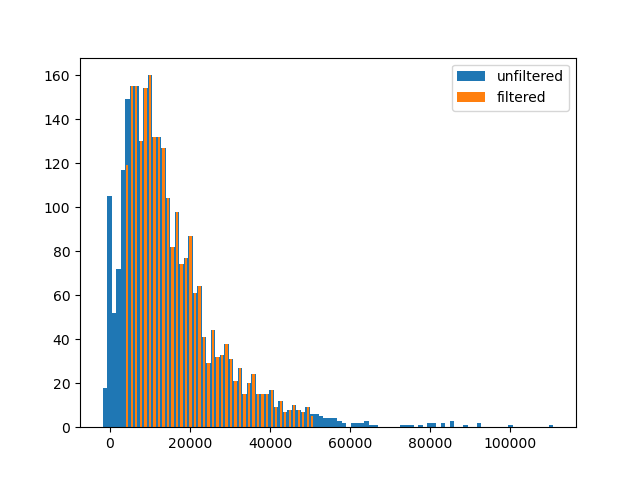

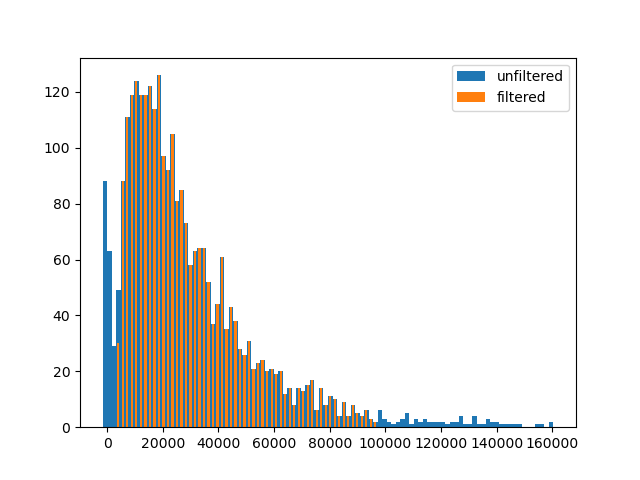

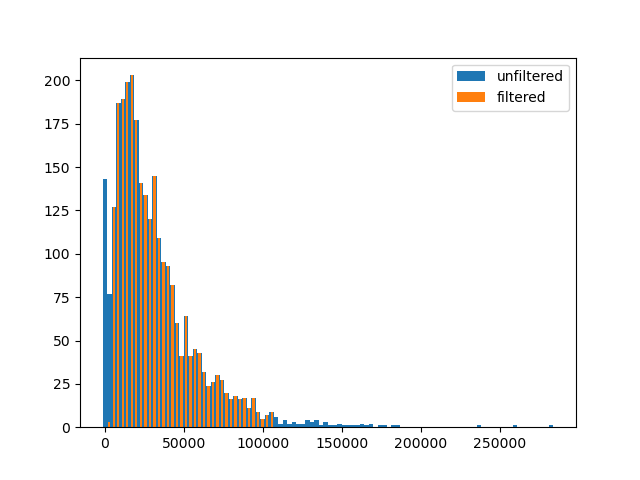

NameError: name 'quad_filter' is not defined

In [7]:
filter_params = []
for raw in raw_datas:
    filter_param = PDC()
    
    B_condition_1 = bounds_filter(raw.I0_intensities_fim0[4,:],[[4000,'None'],[3]],True)
    B_condition_2 = bounds_filter(raw.I0_intensities_fim0[5,:],[[4000,'None'],[3]],True)
    B_condition_3 = bounds_filter(raw.I0_intensities_fim0[6,:],[[4000,'None'],[3]],True)
    B_condition_4 = bounds_filter(raw.I0_intensities_fim0[7,:],[[4000,'None'],[3]],True)
    
    
    bounds_condition = B_condition_1&B_condition_2&B_condition_3&B_condition_4
    
    Q_condition_1 = quad_filter(raw.I0_intensities_fim0[4,:],raw.andor_dir_intensities,[0.05,False],True)
    
    quadratic_condition = Q_condition_1
    
    condition = bounds_condition & quadratic_condition
    
    filter_param.changeValue(condition=condition)
    filter_params = filter_params + [filter_param]
    

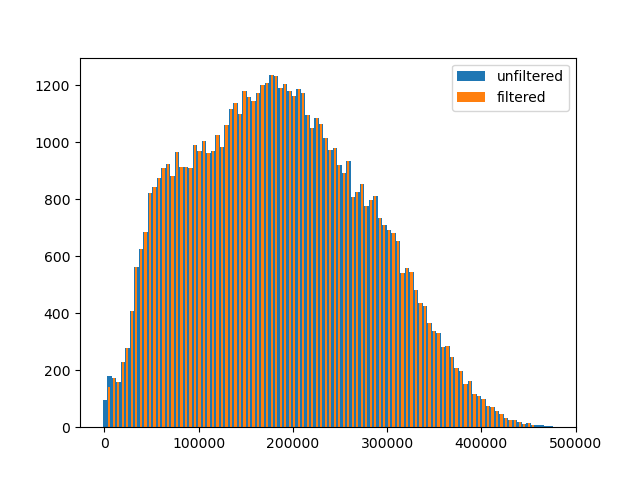

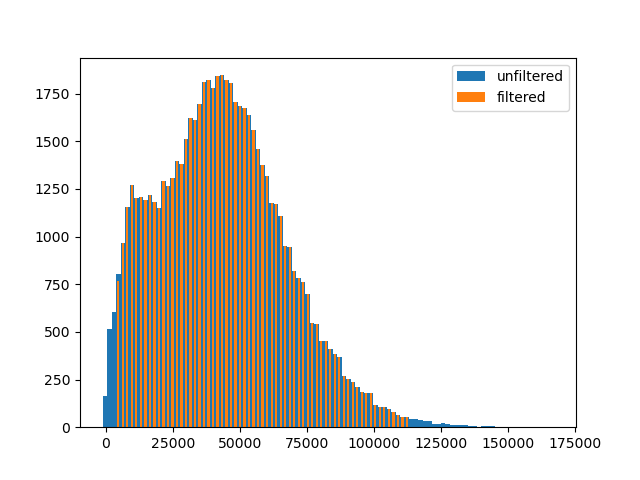

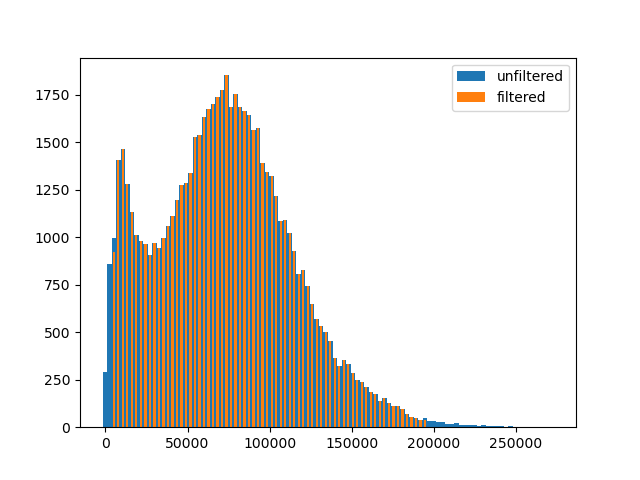

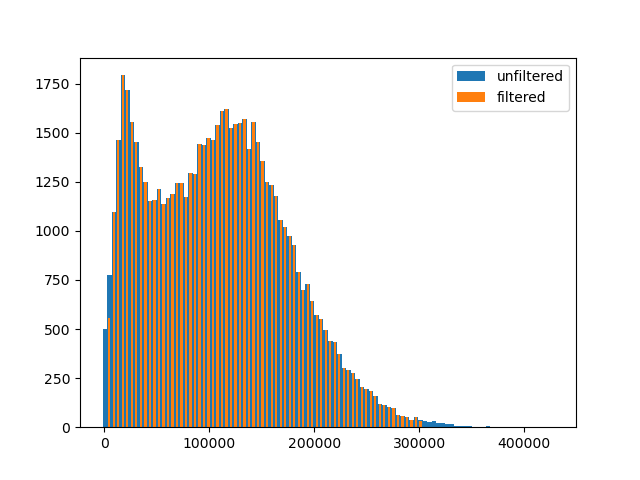

In [7]:
filter_params = []
for raw in raw_datas:
    filter_param = PDC()
    
    B_condition_1 = bounds_filter(raw.I0_intensities_fim0[4,:],[[4000,'None'],[3]],True)
    B_condition_2 = bounds_filter(raw.I0_intensities_fim0[5,:],[[4000,'None'],[3]],True)
    B_condition_3 = bounds_filter(raw.I0_intensities_fim0[6,:],[[4000,'None'],[3]],True)
    B_condition_4 = bounds_filter(raw.I0_intensities_fim0[7,:],[[4000,'None'],[3]],True)
    
    bounds_condition = B_condition_1&B_condition_2&B_condition_3&B_condition_4

    # raw.I0_intensities_fim0[4,:] is I0 intensities from fim0 channel 4

    L_condition_1 = lin_filter(raw.I0_intensities_fim0[4,:], raw.andor_dir_intensities,[0.05,False],True)


    linearity_condition = L_condition_1
    condition = bounds_condition & linearity_condition
    
    filter_param.changeValue(condition=condition)
    filter_params = filter_params + [filter_param]


In [8]:
fim0= (raw_datas[0].I0_intensities_fim1[[4,5,6,7],:]).flatten()

In [13]:
pro_datas = process_data(raw_datas,filter_params,'time',6,6)
# pro_datas = np.asarray(pro_datas)
# print(pro_datas.shape)


time has been completed


In [6]:
# scan_type = 'mono'
scan_type = 'time'

pro_datas = []
for i in range(0,len(raw_datas)):
    pro_data = PDC()
    pumped = raw_datas[i].laser==1
    unpumped = raw_datas[i].laser==0
    condition = filter_params[i].condition
    
    norm_by = raw_datas[i].I0_intensities_fim0[4,:]
    
    if scan_type is 'mono':

        n_bins = 100
        mono_encoder_ev = np.squeeze(mono_calib(raw_datas[i].energy_raw,raw_datas[i].mono_encoder))
        
        x_vals = mono_encoder_ev
        y_vals = raw_datas[i].intensities_fim2[7,:]
        
        ##### pumped #####
        energy,intensity_raw_pumped = \
        mono_spectrum(x_vals[pumped],n_bins,y_vals[pumped])
        
        energy,intensity_filtered_pumped = \
        mono_spectrum(x_vals[condition&pumped],n_bins,y_vals[condition&pumped])
        
        energy,intensity_norm_filtered_pumped = \
        mono_spectrum(x_vals[condition&pumped],n_bins,y_vals[condition&pumped]/norm_by[condition&pumped])
        
        ##### unpumped #####
        energy,intensity_raw_unpumped = \
        mono_spectrum(x_vals[unpumped],n_bins,y_vals[unpumped])
        
        energy,intensity_filtered_unpumped = \
        mono_spectrum(x_vals[condition&unpumped],n_bins,y_vals[condition&unpumped])
        
        energy,intensity_norm_filtered_unpumped = \
        mono_spectrum(x_vals[condition&unpumped],n_bins,y_vals[condition&unpumped]/norm_by[condition&unpumped])

        
        pro_data.changeValue(energy=energy,
                             intensity_raw_pumped = intensity_raw_pumped,
                             intensity_filtered_pumped = intensity_filtered_pumped,
                             intensity_norm_filtered_pumped = intensity_norm_filtered_pumped,
                             intensity_raw_unpumped = intensity_raw_unpumped,
                             intensity_filtered_unpumped = intensity_filtered_unpumped,
                             intensity_norm_filtered_unpumped = intensity_norm_filtered_unpumped)
        
        pro_datas = pro_datas + [pro_data]
        
    if scan_type is 'time':
        
        x_vals = raw_datas[i].lxt
        
        y_vals = raw_datas[i].andor_dir_intensities
        
        #pumped
        d_bins_raw, andor_intensities_time_raw = time_scan(x_vals,y_vals)
        
        d_bins_filt, andor_intensities_time_filt = time_scan(x_vals[condition],y_vals[condition])
        
        andor_intensities_time_norm_filt = \
        time_scan(x_vals[condition&unpumped],y_vals[condition&unpumped]/norm_by[condition&unpumped])[1]
        
        #unpumped
        andor_intensities_time_raw_pumped = time_scan(x_vals[pumped],y_vals[pumped])[1]
        
        andor_intensities_time_filt_pumped = time_scan(x_vals[condition&pumped],y_vals[condition&pumped])[1]
        
        andor_intensities_time_norm_filt_pumped = \
        time_scan(x_vals[condition&pumped],y_vals[condition&pumped]/norm_by[condition&pumped])[1]
        
        pro_data.changeValue(d_bins_raw=d_bins_raw,
                             andor_intensities_time_raw=andor_intensities_time_raw,
                             andor_intensities_time_filt=andor_intensities_time_filt,
                             d_bins_filt=d_bins_filt,
                             andor_intensities_time_norm_filt = andor_intensities_time_norm_filt,
                             andor_intensities_time_raw_pumped = andor_intensities_time_raw_pumped,
                             andor_intensities_time_filt_pumped = andor_intensities_time_filt_pumped,
                             andor_intensities_time_norm_filt_pumped =andor_intensities_time_norm_filt_pumped
                            )
        
        pro_datas = pro_datas + [pro_data]



<IPython.core.display.Javascript object>


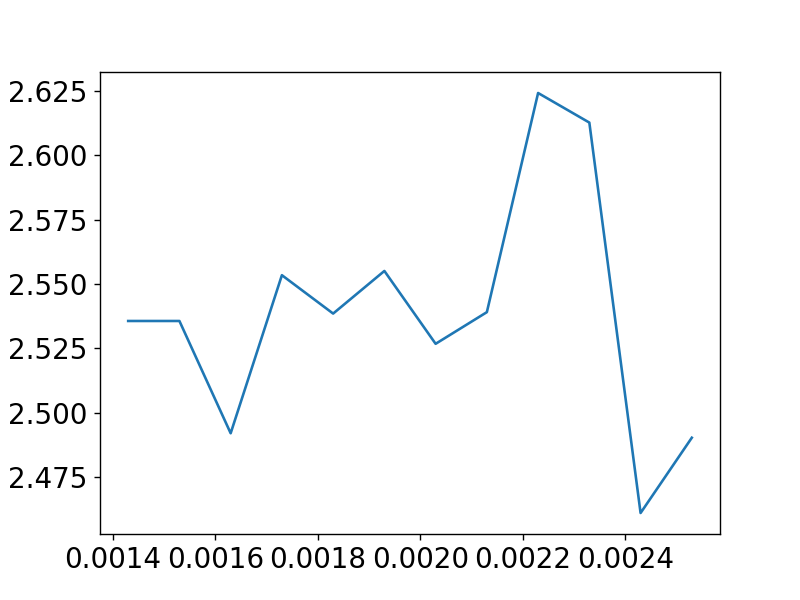

In [7]:
plt.figure()

plt.plot(d_bins_filt,andor_intensities_time_norm_filt)



In [9]:
def quad_filter(data_1,data_2,filt_param,plot_on):

    var_x = data_1
    var_y = data_2
    scale = np.max([var_x,var_y])

    a,b,c = np.polyfit(var_x,var_y,2)

    cond_quad_high = var_y < np.square(var_x) * a + var_x * b + c + filt_param[0]*scale
    cond_quad_low = var_y < np.square(var_x) * a + var_x * b + c - filt_param[0]*scale
    condition = cond_quad_low&cond_quad_high
    if plot_on:
            plt.figure()
            plt.scatter(var_x,var_y,alpha=0.95)
            plt.scatter(var_x[condition],var_y[condition],alpha=0.05)
            plt.show()

    return condition

In [ ]:
def quad_filter(data_1,data_2,filt_param,plot_on)

var_x = data_1
var_y = data_2
scale = np.max([var_x,var_y])

a,b,c = np.polyfit(var_x,var_y,2)

cond_quad_high = var_y < np.square(var_x) * a + var_x * b + c + filt_param[0]*scale
cond_quad_low = var_y < np.square(var_x) * a + var_x * b + c - filt_param[0]*scale
condition = cond_quad_low&cond_quad_high
if plot_on:
        plt.figure()
        plt.scatter(var_x,var_y,alpha=0.95)
        plt.scatter(var_x[condition],var_y[condition],alpha=0.05)
        plt.show()

return condition


def proc_data (scan_type):
    
    pro_datas = []
    for i in range(0,len(raw_datas)):
        pro_data = PDC()
        pumped = raw_datas[i].laser==1
        unpumped = raw_datas[i].laser==0
        condition = filter_params[i].condition

        norm_by = raw_datas[i].I0_intensities_fim0[4,:]

        if scan_type is 'mono':

            n_bins = 100
            mono_encoder_ev = np.squeeze(mono_calib(raw_datas[i].energy_raw,raw_datas[i].mono_encoder))

            x_vals = mono_encoder_ev
            y_vals = raw_datas[i].intensities_fim2[7,:]

            ##### pumped #####
            energy,intensity_raw_pumped = \
            mono_spectrum(x_vals[pumped],n_bins,y_vals[pumped])

            energy,intensity_filtered_pumped = \
            mono_spectrum(x_vals[condition&pumped],n_bins,y_vals[condition&pumped])

            energy,intensity_norm_filtered_pumped = \
            mono_spectrum(x_vals[condition&pumped],n_bins,y_vals[condition&pumped]/norm_by[condition&pumped])

            ##### unpumped #####
            energy,intensity_raw_unpumped = \
            mono_spectrum(x_vals[unpumped],n_bins,y_vals[unpumped])

            energy,intensity_filtered_unpumped = \
            mono_spectrum(x_vals[condition&unpumped],n_bins,y_vals[condition&unpumped])

            energy,intensity_norm_filtered_unpumped = \
            mono_spectrum(x_vals[condition&unpumped],n_bins,y_vals[condition&unpumped]/norm_by[condition&unpumped])


            pro_data.changeValue(energy=energy,
                                 intensity_raw_pumped = intensity_raw_pumped,
                                 intensity_filtered_pumped = intensity_filtered_pumped,
                                 intensity_norm_filtered_pumped = intensity_norm_filtered_pumped,
                                 intensity_raw_unpumped = intensity_raw_unpumped,
                                 intensity_filtered_unpumped = intensity_filtered_unpumped,
                                 intensity_norm_filtered_unpumped = intensity_norm_filtered_unpumped)

            pro_datas = pro_datas + [pro_data]

        if scan_type is 'time':

            x_vals = raw_datas[i].lxt

            y_vals = raw_datas[i].andor_dir_intensities

            #pumped
            d_bins_raw, andor_intensities_time_raw = time_scan(x_vals,y_vals)

            d_bins_filt, andor_intensities_time_filt = time_scan(x_vals[condition],y_vals[condition])

            andor_intensities_time_norm_filt = \
            time_scan(x_vals[condition&unpumped],y_vals[condition&unpumped]/norm_by[condition&unpumped])[1]

            #unpumped
            andor_intensities_time_raw_pumped = time_scan(x_vals[pumped],y_vals[pumped])[1]

            andor_intensities_time_filt_pumped = time_scan(x_vals[condition&pumped],y_vals[condition&pumped])[1]

            andor_intensities_time_norm_filt_pumped = \
            time_scan(x_vals[condition&pumped],y_vals[condition&pumped]/norm_by[condition&pumped])[1]

            pro_data.changeValue(d_bins_raw=d_bins_raw,
                                 andor_intensities_time_raw=andor_intensities_time_raw,
                                 andor_intensities_time_filt=andor_intensities_time_filt,
                                 d_bins_filt=d_bins_filt,
                                 andor_intensities_time_norm_filt = andor_intensities_time_norm_filt,
                                 andor_intensities_time_raw_pumped = andor_intensities_time_raw_pumped,
                                 andor_intensities_time_filt_pumped = andor_intensities_time_filt_pumped,
                                 andor_intensities_time_norm_filt_pumped =andor_intensities_time_norm_filt_pumped
                                )

            pro_datas = pro_datas + [pro_data]
    
    print('process'+''+scan_type+''+'complete')
    
    return pro_datas

In [19]:
x_vals = raw_datas[0].lxt
        
y_vals = raw_datas[0].andor_dir_intensities

pumped = raw_datas[0].laser==1

norm_by = raw_datas[0].I0_intensities_fim0[4,:]

# andor_intensities_time_norm_filt_pumped = \
#         time_scan(x_vals[condition&pumped],y_vals[condition&pumped]/norm_by[condition&pumped])[1]

# d_bins_filt, andor_intensities_time_filt = time_scan(x_vals[condition],y_vals[condition])

# print(time_scan(x_vals,y_vals))

[-0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436
 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436
 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436
 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436
 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436
 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436
 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436
 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436
 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436
 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436
 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436
 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436
 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0.02397436
 -0.02397436 -0.02397436 -0.02397436 -0.02397436 -0

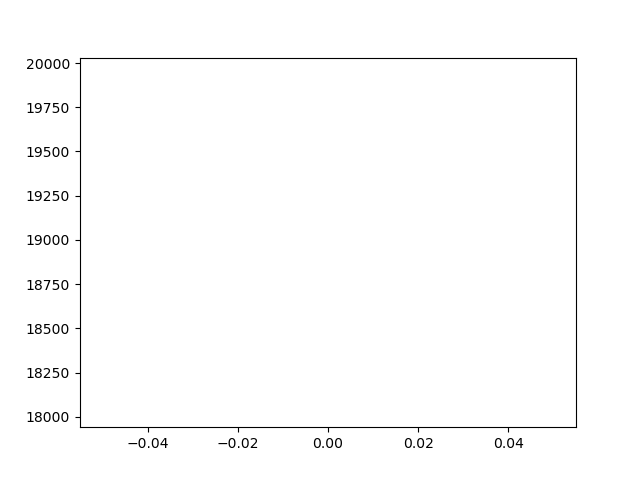

In [14]:
# print(pro_datas[0].andor_intensities_time_filt)

plt.figure()
# plt.plot(pro_datas[0].energy)
plt.plot(pro_datas[0].andor_intensities_time_raw)
# plt.plot(pro_datas[0].d_bins_raw,pro_datas[0].andor_intensities_time_raw)
# avg_intensity_raw_pumped = np.asarray([pro_data.intensity_raw_pumped for pro_data in pro_datas])


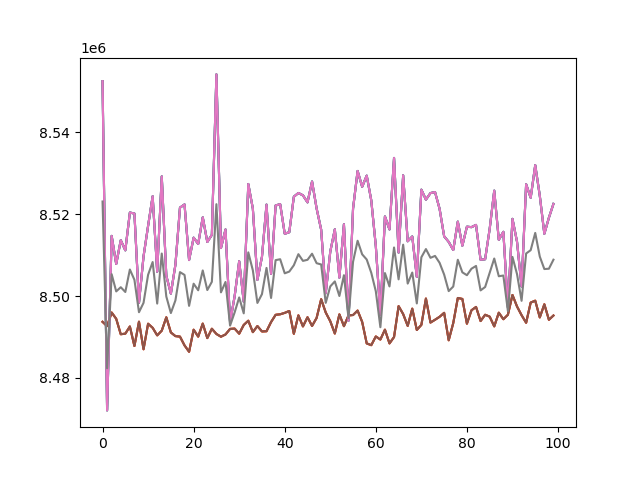

In [21]:
plt.plot(avg_intensity_raw_pumped[1])
plt.plot(avg_intensity_raw_pumped[0])
plt.plot(np.mean(avg_intensity_raw_pumped,0))
plt.show()